<a href="https://colab.research.google.com/github/hseyeon1006/ESAA_OB/blob/main/%EC%84%B8%EC%97%B0_%EC%B5%9C%EC%A2%85.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://dacon.io/competitions/official/235875/codeshare/4635?page=2&dtype=recent

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#drive mount
from google.colab import drive
drive.mount('/content/mydrive')

Mounted at /content/mydrive


In [3]:
#import package
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#데이터 불러오기
train = pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/train_data.csv") #경로 반영
test = pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/test_data.csv")
submission = pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/sample_submission.csv")

In [ ]:
print(train.info(), end='\n\n')
print(test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24998 entries, 0 to 24997
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       24998 non-null  int64 
 1   premise     24998 non-null  object
 2   hypothesis  24998 non-null  object
 3   label       24998 non-null  object
dtypes: int64(1), object(3)
memory usage: 781.3+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1666 entries, 0 to 1665
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   index       1666 non-null   int64 
 1   premise     1666 non-null   object
 2   hypothesis  1666 non-null   object
 3   label       1666 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB
None


In [ ]:
print('Train Columns: ', train.columns)
print('Test Columns: ', test.columns)

Train Columns:  Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')
Test Columns:  Index(['index', 'premise', 'hypothesis', 'label'], dtype='object')


In [ ]:
print('Train Label: ', train['label'].value_counts(), sep='\n', end='\n\n')
print('Test Label: ', test['label'].value_counts(), sep='\n')

Train Label: 
entailment       8561
contradiction    8489
neutral          7948
Name: label, dtype: int64

Test Label: 
answer    1666
Name: label, dtype: int64


In [ ]:
print('Train Null: ', train.isnull().sum(), sep='\n', end='\n\n')
print('Test Null: ', test.isnull().sum(), sep='\n')

Train Null: 
index         0
premise       0
hypothesis    0
label         0
dtype: int64

Test Null: 
index         0
premise       0
hypothesis    0
label         0
dtype: int64


Label 분포

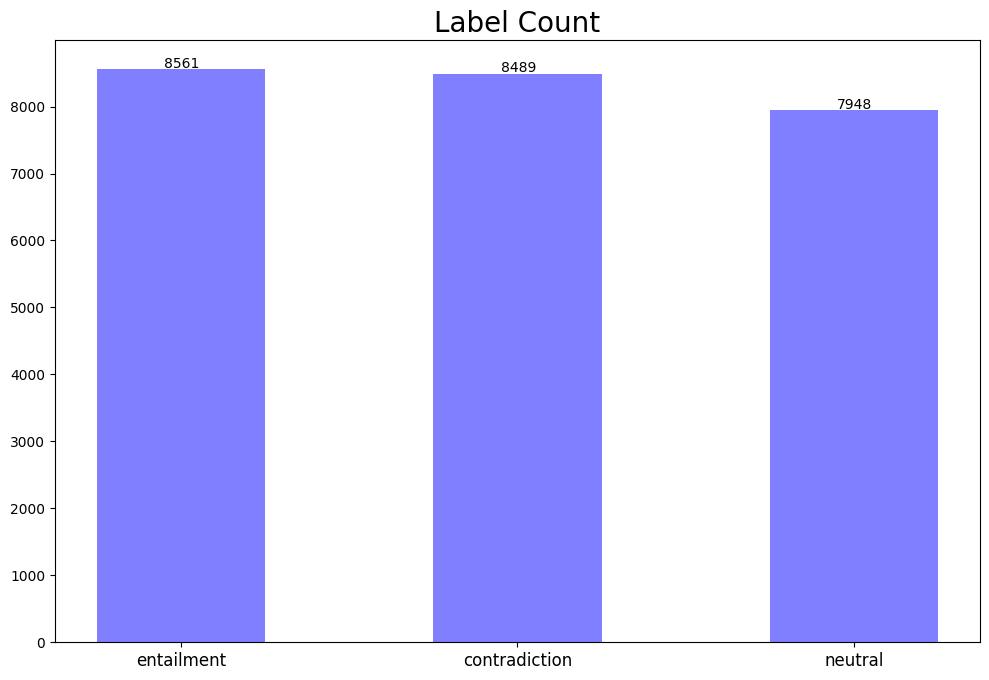

In [ ]:
#Train Dataset의 Label 분포를 Bar Chart를 사용하여 시각화

feature = train['label']

plt.figure(figsize=(10,7.5))
plt.title('Label Count', fontsize=20)

temp = feature.value_counts()
plt.bar(temp.keys(), temp.values, width=0.5, color='b', alpha=0.5)
plt.text(-0.05, temp.values[0]+20, s=temp.values[0])
plt.text(0.95, temp.values[1]+20, s=temp.values[1])
plt.text(1.95, temp.values[2]+20, s=temp.values[2])

plt.xticks(temp.keys(), fontsize=12) # x축 값, 폰트 크기 설정
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정
plt.show() # 그래프 나타내기

전체, 가설 길이 확인

In [ ]:
# Train에 존재하는 Premise(전제), Hypothesis(가설)의 길이를 확인하고 이를 통해 Tokenizer의 max_length 설정이 가능
max_len = np.max(train['premise'].str.len())
min_len = np.min(train['premise'].str.len())
mean_len = np.mean(train['premise'].str.len())

print('Max Premise Length: ', max_len)
print('Min Premise Length: ', min_len)
print('Mean Premise Lenght: ', mean_len, '\n')

max_len = np.max(train['hypothesis'].str.len())
min_len = np.min(train['hypothesis'].str.len())
mean_len = np.mean(train['hypothesis'].str.len())

print('Max Hypothesis Length: ', max_len)
print('Min Hypothesis Length: ', min_len)
print('Mean Hypothesis Lenght: ', mean_len)

Max Premise Length:  90
Min Premise Length:  19
Mean Premise Lenght:  45.406552524201935 

Max Hypothesis Length:  103
Min Hypothesis Length:  5
Mean Hypothesis Lenght:  24.924433954716378


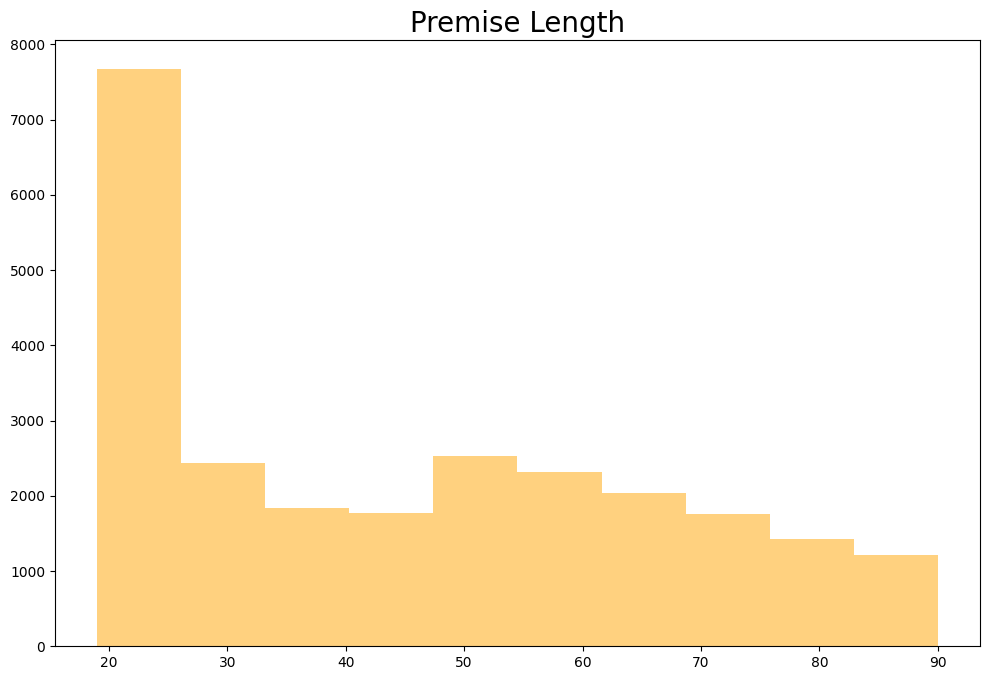

In [ ]:
from collections import Counter

plt.figure(figsize=(10,7.5))
plt.title('Premise Length', fontsize=20)

plt.hist(train['premise'].str.len(), alpha=0.5, color='orange')
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # 레이아웃 설정

plt.show()

In [5]:
! pip install -qq transformers==4.16.0 datasets sentencepiece

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 49.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 52.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 79.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 21.6 MB/s eta 0:00:00


In [6]:
!curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id=1KG_cdxFYy-w1UTA9hOsASk87_B_aBXUR" > /dev/null
!curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm=`awk '/download/ {print $NF}' ./cookie`&id=1KG_cdxFYy-w1UTA9hOsASk87_B_aBXUR" -o open.zip
!unzip open.zip
!rm -rf open.zip cookie
!nvidia-smi

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:--  0:00:01 --:--:--     0
100 1773k  100 1773k    0     0  1104k      0  0:00:01  0:00:01 --:--:-- 1104k
Archive:  open.zip
  inflating: open/sample_submission.csv  
  inflating: open/test_data.csv      
  inflating: open/train_data.csv     
Sun Nov 26 12:58:51 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+==

In [7]:
import os
import pandas as pd
import numpy as np

import random
from tqdm import tqdm
import gc

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold

from transformers import TrainingArguments, Trainer
from transformers import AutoModelForSequenceClassification, AutoModel, AutoConfig, AutoTokenizer, AdamW
from transformers.optimization import get_linear_schedule_with_warmup
from datasets import load_dataset

# from Korpora import KorNLIKorpus

RANDOM_SEED = 42

In [8]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    os.environ["PYTHONHASHSEED"] = str(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(RANDOM_SEED)

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [9]:
# MODEL_NAME = "klue/roberta-large"
# MODEL_NAME = "monologg/koelectra-base-v3-discriminator"
MODEL_NAME = "kykim/electra-kor-base"
# MODEL_NAME = "Jinhwan/krelectra-base-mecab"
# MODEL_NAME = "skt/kobert-base-v1"
# NUM_SAMPLES = 10000
LEARNING_RATE = 5e-5
BATCH_SIZE = 32
MAX_LENGTH = 216
NUM_FOLDS = 5
EPOCHS = 1

In [10]:
nli_train = load_dataset("klue", "nli", split="train")
nli_validation = load_dataset("klue", "nli", split="validation")
nli_train = pd.DataFrame(nli_train)
nli_validation = pd.DataFrame(nli_validation)
print(len(nli_train)+len(nli_validation))
nli_data = pd.concat([nli_train, nli_validation], axis=0)
# nli_data

Generating train split:   0%|          | 0/24998 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3000 [00:00<?, ? examples/s]

27998


In [11]:
class BertLSTM(nn.Module):
    def __init__(self, model_name):
        super(BertLSTM, self).__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        self.hidden_dim = self.bert.config.hidden_size
        self.lstm = nn.LSTM(input_size=self.hidden_dim,
                            hidden_size=self.hidden_dim,
                            num_layers=1,
                            bidirectional=True,
                            batch_first=True)
        self.linear = nn.Linear(in_features=2*self.hidden_dim, out_features=3)

    def forward(self, input_ids, attention_mask):
        out = self.bert(input_ids=input_ids, attention_mask=attention_mask)["last_hidden_state"]
        _, (hidden, _) = self.lstm(out)
        output = torch.cat([hidden[0], hidden[1]], dim=1)
        output = self.linear(output)
        return output

In [12]:
def get_tokenized(tokenizer, premise, hypothesis):
    return tokenizer(
        premise,
        hypothesis,
        max_length=216,
        truncation=True,
        padding=True,
        add_special_tokens=True,
        return_tensors="pt"
    )

In [13]:
class NLIDataset(Dataset):
    def __init__(self, pair_dataset, label):
        self.pair_dataset = pair_dataset
        self.label = label

    def __len__(self):
        return len(self.label)

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        item['label'] = torch.tensor(self.label[idx])
        return item


class TestDataset(Dataset):
    def __init__(self, pair_dataset):
        self.pair_dataset = pair_dataset

    def __len__(self):
        return len(self.pair_dataset["input_ids"])

    def __getitem__(self, idx):
        item = {key: val[idx].clone().detach() for key, val in self.pair_dataset.items()}
        return item

In [14]:
def get_datloader(tokenizer, train_data, valid_data):
    train_tokenized = get_tokenized(tokenizer, list(train_data["premise"]), list(train_data["hypothesis"]))
    valid_tokenized = get_tokenized(tokenizer, list(valid_data["premise"]), list(valid_data["hypothesis"]))

    train_dataset = NLIDataset(train_tokenized, list(train_data["label"]))
    valid_dataset = NLIDataset(valid_tokenized, list(valid_data["label"]))

    train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, pin_memory=True, shuffle=True)
    valid_dataloader = DataLoader(valid_dataset, batch_size=BATCH_SIZE, pin_memory=True, shuffle=False)

    return train_dataloader, valid_dataloader

In [15]:
def fetch_scheduler(model, train_dataloader):
    optimizer = torch.optim.Adam(model.parameters(), lr=LEARNING_RATE)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer,
                                                    max_lr=LEARNING_RATE,
                                                    steps_per_epoch=len(train_dataloader),
                                                    epochs=EPOCHS,
                                                    pct_start=0.1)
    return optimizer, scheduler

In [16]:
def train(model, optimizer, scheduler, criterion, train_dataloader, valid_dataloader):
    for epoch in range(EPOCHS):
        gc.collect()
        model.train()
        epoch_loss = 0
        steps = 0
        pbar = tqdm(train_dataloader)
        for batch in pbar:
            input_ids = batch["input_ids"].to(device)
            attention_mask = batch["attention_mask"].to(device)
            label = batch["label"].to(device)

            output = model(input_ids, attention_mask)
            loss = criterion(output, label)
            epoch_loss += loss.detach().cpu().numpy()
            steps += 1

            optimizer.zero_grad()
            loss.backward()

            optimizer.step()
            scheduler.step()

            pbar.set_postfix({'loss': epoch_loss/steps,
                            "lr": optimizer.param_groups[0]["lr"],
                            "cls_lr": optimizer.param_groups[-1]["lr"]})
            # del loss, input_ids, attention_mask, label, output

        pbar.close()

        with torch.no_grad():
            model.eval()
            all_preds, all_labels = [], []
            for valid_batch in tqdm(valid_dataloader):
                input_ids = valid_batch["input_ids"].to(device)
                attention_mask = valid_batch["attention_mask"].to(device)
                label = valid_batch["label"]

                output = model(input_ids, attention_mask)
                preds = output.argmax(-1).detach().cpu().numpy()
                all_preds.extend(preds)
                all_labels.extend(label)
                # del input_ids, attention_mask, label, output
            accuracy = accuracy_score(all_labels, all_preds)
            print(f"Epoch [{epoch+1}/{EPOCHS}] Accuracy : {accuracy}")

    del train_dataloader, valid_dataloader
    gc.collect()

In [17]:
def inference(model, test_dataloader):
    model.eval()
    all_preds = []
    for batch in tqdm(test_dataloader):
        input_ids = batch["input_ids"].to(device)
        attention_mask = batch["attention_mask"].to(device)

        output = model(input_ids, attention_mask)
        preds = output.argmax(-1).detach().cpu().numpy()
        all_preds.extend(preds)

        # del input_ids, attention_mask, output
    # del test_dataloader
    return all_preds

In [19]:
skf = StratifiedKFold(n_splits=NUM_FOLDS, random_state=RANDOM_SEED, shuffle=True)
num_to_label = {0: "entailment", 1: "neutral", 2: "contradiction"}
fold = 0
for fold_num, (train_idx, valid_idx) in enumerate(skf.split(nli_data[["premise", "hypothesis"]], nli_data["label"])):

    train_data = nli_data.iloc[train_idx]
    valid_data = nli_data.iloc[valid_idx]

    model = BertLSTM(MODEL_NAME).to(device)
    tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

    train_dataloader, valid_dataloader = get_datloader(tokenizer, train_data, valid_data)

    optimizer, scheduler = fetch_scheduler(model, train_dataloader)
    criterion = nn.CrossEntropyLoss(label_smoothing=0.2)

    print("="*100)
    print(f"Fold-{fold_num} Training")
    print("="*100)
    train(model,
          optimizer,
          scheduler,
          criterion,
          train_dataloader,
          valid_dataloader)

    test_df = pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/test_data.csv")
    test_tokenized = get_tokenized(
                                    tokenizer,
                                    list(test_df["premise"]),
                                    list(test_df["hypothesis"]))
    test_dataset = TestDataset(test_tokenized)
    test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False, pin_memory=True)

    submission = pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/sample_submission.csv")
    predictions = inference(model, test_dataloader)
    submission["label"] = predictions

    submission["label"] = submission["label"].apply(lambda x: num_to_label[x])
    submission.to_csv(f"./submission-fold{fold_num}.csv", index=False)

    del model, train_dataloader, valid_dataloader, test_dataloader
    _ = gc.collect()
    torch.cuda.empty_cache()

    fold = fold_num

Some weights of the model checkpoint at kykim/electra-kor-base were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/80.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/336k [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Fold-0 Training


100%|██████████| 175/175 [00:27<00:00,  6.32it/s]


Epoch [1/1] Accuracy : 0.8775


100%|██████████| 53/53 [00:08<00:00,  6.30it/s]
Some weights of the model checkpoint at kykim/electra-kor-base were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Fold-1 Training


100%|██████████| 175/175 [00:35<00:00,  5.00it/s]


Epoch [1/1] Accuracy : 0.8855357142857143


100%|██████████| 53/53 [00:08<00:00,  6.31it/s]
Some weights of the model checkpoint at kykim/electra-kor-base were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Fold-2 Training


100%|██████████| 175/175 [00:34<00:00,  5.01it/s]


Epoch [1/1] Accuracy : 0.8741071428571429


100%|██████████| 53/53 [00:08<00:00,  6.34it/s]
Some weights of the model checkpoint at kykim/electra-kor-base were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Fold-3 Training


100%|██████████| 175/175 [00:28<00:00,  6.08it/s]


Epoch [1/1] Accuracy : 0.8731916413645294


100%|██████████| 53/53 [00:08<00:00,  6.29it/s]
Some weights of the model checkpoint at kykim/electra-kor-base were not used when initializing ElectraModel: ['discriminator_predictions.dense.weight', 'discriminator_predictions.dense_prediction.bias', 'discriminator_predictions.dense.bias', 'discriminator_predictions.dense_prediction.weight']
- This IS expected if you are initializing ElectraModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing ElectraModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


Fold-4 Training


100%|██████████| 175/175 [00:33<00:00,  5.21it/s]


Epoch [1/1] Accuracy : 0.8842650473298803


100%|██████████| 53/53 [00:08<00:00,  6.36it/s]


In [20]:
sub_fold = [f"./submission-fold{f}.csv" for f in range(fold)]
final_df = pd.DataFrame()
for idx, sub in enumerate(sub_fold):
    df = pd.read_csv(sub)
    final_df[idx] = df["label"]

final_label = list(final_df.mode(axis=1)[0])
submission = pd.read_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/sample_submission.csv")
submission["label"] = final_label
submission.to_csv("/content/mydrive/MyDrive/Colab_Notebooks/학회 OB/프로젝트/데이터/한국어 문장 관계 분류/submission.csv", index=False)